In [1]:
print("Hello Juno")

Hello Juno


In [141]:
import sys
import snap
import itertools
from IPython.display import Image, display
import pandas as pd

In [3]:
G = snap.TUNGraph.Load(snap.TFIn("hw1-q2.graph"))

In [4]:
def get_nodes_and_edges(my_graph):
    n_nodes = my_graph.GetNodes()
    n_edges = my_graph.GetEdges()
    print(f"The graph has {n_nodes:,d} nodes, {n_edges:,d} edges.")
def show_g(graph, case_name, print_info=True):
    case_txt = case_name+".txt"
    case_png = case_name+".png"
    snap.DrawGViz(graph, snap.gvlDot, case_png, case_name)
    if print_info:
        get_nodes_and_edges(graph)
    return Image(case_png)

In [5]:
get_nodes_and_edges(G)

The graph has 1,589 nodes, 2,742 edges.


In [6]:
show_g(G, "q2", print_info=True)

The graph has 1,589 nodes, 2,742 edges.


In [7]:
snap.SaveEdgeList(G, "hw1_q2_graph.txt", "Save as tab-separated list of edges")

In [8]:
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(G, InDegV)
for item in InDegV:
    if item.GetVal1()==9:
        print("node ID %d: in-degree %d" % (item.GetVal1(), item.GetVal2()))

node ID 9: in-degree 6


## egonet


### subgraph demo
Use node id list to define subgraph.

In [183]:
V = snap.TIntV()
selected_id_number = 4
for i in range(selected_id_number):
    V.Add(i)
GIn = snap.GenRndGnm(snap.PUNGraph, 10, 15)
GOut = snap.ConvertSubGraph(snap.PUNGraph, GIn, V)
for NI in GOut.Nodes():
    print("node: %d" % NI.GetId())

node: 0
node: 1
node: 2
node: 3


The graph has 10 nodes, 15 edges.


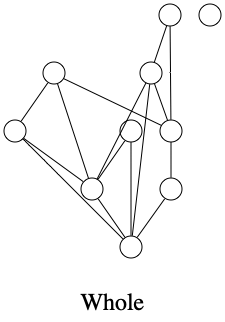

In [184]:
show_g(GIn, "Whole")

The graph has 4 nodes, 2 edges.


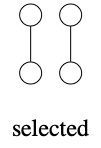

In [185]:
show_g(GOut, "selected")

In [186]:
for EI in GIn.Edges():
    print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

edge (0, 2)
edge (0, 4)
edge (0, 7)
edge (1, 3)
edge (1, 4)
edge (2, 7)
edge (2, 9)
edge (3, 4)
edge (3, 7)
edge (3, 9)
edge (4, 8)
edge (6, 7)
edge (6, 9)
edge (7, 9)
edge (8, 9)


In [187]:
for EI in GOut.Edges():
    print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

edge (0, 2)
edge (1, 3)


In [189]:
results = snap.GetEdgesInOut(GIn, V)
print("EdgesIn: %s EdgesOut: %s" % (results[0], results[1]))

EdgesIn: 2 EdgesOut: 8


In [190]:
results = snap.GetEdgesInOut(GOut, V)
print("EdgesIn: %s EdgesOut: %s" % (results[0], results[1]))

EdgesIn: 2 EdgesOut: 0


### id list

In [104]:
def get_conneted_id_list(graph, with_id, print_info=False):
    connected_id_list = [with_id]
    for EI in graph.Edges():
        if EI.GetSrcNId() == with_id :
            if print_info:
                print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))
            connected_id_list.append(EI.GetDstNId())
        elif EI.GetDstNId() == with_id :
            if print_info:
                print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))
            connected_id_list.append(EI.GetSrcNId())
    if print_info:
        print(f"The list: {connected_id_list}")
        print(f"The number of node in the graph: {len(connected_id_list)}")

    return connected_id_list

In [105]:
the_id_list = get_conneted_id_list(G, 9, print_info=True)

edge (7, 9)
edge (9, 10)
edge (9, 11)
edge (9, 1424)
edge (9, 1425)
edge (9, 1532)
The list: [9, 7, 10, 11, 1424, 1425, 1532]
The number of node in the graph: 7


In [179]:
# neighbor_list = []
# for curr_id in the_id_list:
#     print(f"Current central id: {curr_id}")
#     id_info = get_conneted_id_list(G, curr_id, print_info=True)
#     neighbor_list.append(id_info)
# print(neighbor_list)
# flat_list = [item for sublist in neighbor_list for item in sublist]
# flat_list = list(dict.fromkeys(flat_list))
# print(flat_list)

# V = snap.TIntV()
# for i in flat_list:
#     V.Add(i)
# SubG = snap.GetSubGraph(G, V)

# show_g(SubG, "sub_g")

## Put together

In [126]:
def get_id_degree(graph, print_info=False):
    InDegV = snap.TIntPrV()
    snap.GetNodeInDegV(graph, InDegV)
    id_list = []
    degree_list = []
    for item in InDegV:
        if print_info:
            print("node ID %d: in-degree %d" % (item.GetVal1(), item.GetVal2()))
        id_list.append(item.GetVal1())
        degree_list.append(item.GetVal2())
    return id_list, degree_list  

In [152]:
## http://snap.stanford.edu/snappy/doc/reference/GetEdgesInOut.html?highlight=getedgesinout
def get_egonet_info(graph, from_this_id, print_info = False):
    the_id_list = get_conneted_id_list(graph, from_this_id, print_info=False)
    V = snap.TIntV()
    for i in the_id_list:
        V.Add(i)
    results = snap.GetEdgesInOut(graph, V)
    if print_info:
        print("EdgesIn: %s EdgesOut: %s" % (results[0], results[1])) 
    return results[0], results[1]


In [153]:
the_id, the_degree = get_id_degree(G)

In [154]:
total_n_of_node = G.GetNodes()
edge_within_the_nodes = []
edge_between_the_rest = []
for i in range(total_n_of_node):
    edge_within, edge_between = get_egonet_info(G, i)   
    edge_within_the_nodes.append(edge_within)
    edge_between_the_rest.append(edge_between)


In [155]:
quick_view = 5
my_value = [the_id, the_degree, edge_within_the_nodes, edge_between_the_rest]
for i in my_value:
    print (i[:quick_view])


[0, 1, 2, 3, 4]
[2, 3, 4, 4, 4]
[3, 4, 10, 10, 10]
[1, 0, 0, 0, 0]


In [161]:
df_u_v = pd.DataFrame(list(zip(the_degree, edge_within_the_nodes, edge_between_the_rest)), index=the_id, columns=['degree', 'cnt_edge_within_egonet', 'cnt_edge_connect_egonet'])

In [162]:
display(df_u_v[:10])

degree  cnt_edge_within_egonet  cnt_edge_connect_egonet
0       2                       3                        1
1       3                       4                        0
2       4                      10                        0
3       4                      10                        0
4       4                      10                        0
5       4                      10                        0
6       4                      10                        0
7       4                       7                        3
8       1                       1                        3
9       6                      10                        1

In [163]:
df_u_v[df_u_v['degree'] == 0]

degree  cnt_edge_within_egonet  cnt_edge_connect_egonet
19         0                       0                        0
26         0                       0                        0
41         0                       0                        0
89         0                       0                        0
101        0                       0                        0
...      ...                     ...                      ...
1527       0                       0                        0
1528       0                       0                        0
1552       0                       0                        0
1559       0                       0                        0
1582       0                       0                        0

[128 rows x 3 columns]

### Sanity Check

In [178]:
Count = snap.CntDegNodes(G, 0)
print("Undirected Graph: Count of nodes with degree 0 is %d" % Count)

Undirected Graph: Count of nodes with degree 0 is 128


## Cosine Similarity

In [164]:
from sklearn.metrics.pairwise import cosine_similarity

In [166]:
cos_similarity = cosine_similarity(df_u_v)

In [167]:
df_cos_similarity = pd.DataFrame.from_records(cos_similarity)

In [168]:
display(df_cos_similarity[:3])

0         1         2         3         4         5         6     \
0  1.000000  0.962140  0.942954  0.942954  0.942954  0.942954  0.942954   
1  0.962140  1.000000  0.965616  0.965616  0.965616  0.965616  0.965616   
2  0.942954  0.965616  1.000000  1.000000  1.000000  1.000000  1.000000   

       7         8         9     ...      1579      1580      1581  1582  \
0  0.994192  0.644658  0.981848  ...  0.578262  0.944911  0.944911   0.0   
1  0.929981  0.422116  0.991055  ...  0.338660  0.989949  0.989949   0.0   
2  0.928226  0.391925  0.983631  ...  0.331906  0.919145  0.919145   0.0   

       1583      1584      1585      1586      1587      1588  
0  0.944911  0.944911  0.944911  0.925820  0.925820  0.578262  
1  0.989949  0.989949  0.989949  0.808290  0.808290  0.338660  
2  0.919145  0.919145  0.919145  0.750479  0.750479  0.331906  

[3 rows x 1589 columns]

In [172]:
id_9 = df_cos_similarity[9:10]

In [177]:
id_9.sort_values(by=9, axis=1, ascending=False)

9         415       286       288       1336      1054      189       275   \
9   1.0  0.999616  0.996344  0.996344  0.996118  0.996118  0.995791  0.995791   

       851       558   ...  1126  727   728   1144  1143  735   740   295   \
9  0.995216  0.995216  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   741   510   
9   0.0   0.0  

[1 rows x 1589 columns]

## 2.3 Role Discovery

### (a) Histogram

(array([128.,   0.,   4.,   8.,  25.,  15.,  68.,  15.,  43.,  35.,  24.,
         39.,  48.,  32.,  35.,  23.,  67.,  53., 143., 784.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

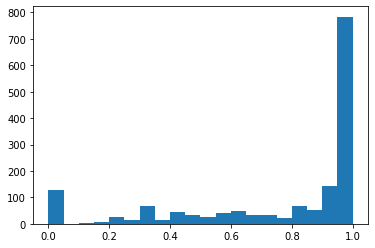

In [191]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(id_9, bins=20)

Discussion: Can you spot some groups / roles? How many can you spot?  
Response: Yes. There are two groups where the similarity equals zero and one.

In [193]:
display(id_9.sort_values(by=9, axis=1, ascending=False))
display(id_9.sort_values(by=9, axis=1, ascending=True))


9         415       286       288       1336      1054      189       275   \
9   1.0  0.999616  0.996344  0.996344  0.996118  0.996118  0.995791  0.995791   

       851       558   ...  1126  727   728   1144  1143  735   740   295   \
9  0.995216  0.995216  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   741   510   
9   0.0   0.0  

[1 rows x 1589 columns]

604   1340  876   891   1334  1330  1319  420   159   1126  ...      785   \
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.995216   

       104       275       189       1336      1054      286       288   \
9  0.995216  0.995791  0.995791  0.996118  0.996118  0.996344  0.996344   

       415   9     
9  0.999616   1.0  

[1 rows x 1589 columns]

In [200]:
similarity_1_list = [9, 415, 286, 288]
display(df_u_v.iloc[similarity_1_list, :])

degree  cnt_edge_within_egonet  cnt_edge_connect_egonet
9         6                      10                        1
415       7                      11                        1
286       3                       5                        0
288       3                       5                        0

In [201]:
similarity_0_list = [9, 604, 1340, 876]
display(df_u_v.iloc[similarity_0_list, :])

degree  cnt_edge_within_egonet  cnt_edge_connect_egonet
9          6                      10                        1
604        0                       0                        0
1340       0                       0                        0
876        0                       0                        0

### (b) Plot subgraph

In [211]:
def plot_sub_graph(graph, central_id):
    the_id_list = get_conneted_id_list(G, central_id, print_info=True)
    V = snap.TIntV()
    for i in the_id_list:
        V.Add(i)
    GOut = snap.ConvertSubGraph(snap.PUNGraph, G, V)
    # for NI in GOut.Nodes():
    #     print("node: %d" % NI.GetId())
    return show_g(GOut, "id_"+str(central_id))

edge (7, 9)
edge (9, 10)
edge (9, 11)
edge (9, 1424)
edge (9, 1425)
edge (9, 1532)
The list: [9, 7, 10, 11, 1424, 1425, 1532]
The number of node in the graph: 7
The graph has 7 nodes, 10 edges.


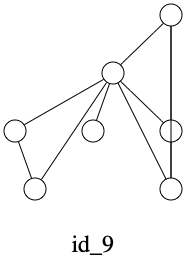

In [212]:
plot_sub_graph(G, 9)

edge (247, 415)
edge (414, 415)
edge (415, 922)
edge (415, 1124)
edge (415, 1125)
edge (415, 1233)
edge (415, 1234)
The list: [415, 247, 414, 922, 1124, 1125, 1233, 1234]
The number of node in the graph: 8
The graph has 8 nodes, 11 edges.


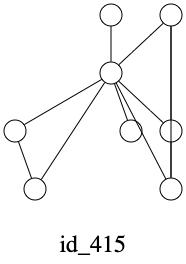

In [214]:
plot_sub_graph(G, 415)

edge (286, 287)
edge (286, 288)
edge (286, 289)
The list: [286, 287, 288, 289]
The number of node in the graph: 4
The graph has 4 nodes, 5 edges.


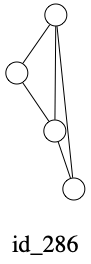

In [216]:
plot_sub_graph(G, 286)

The list: [604]
The number of node in the graph: 1
The graph has 1 nodes, 0 edges.


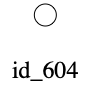

In [215]:
plot_sub_graph(G, 604)

Discussion: Briefly argue how different structural roles are captured in 1-2 sentences. 
Response: One could define the desired metric for computing similarity. The graph with higher similarity "looks" similar. In our case, the graph with lowest similarity only contains the node itself. 